In [1]:
# dataframe ---> tabular data, label, 
# ML = supervised (Regression (Numeric), Classification (Categorial data, Binary data)), unsupervised
# Scikit_learn (sklearn)
# EDA (Exploratoy data analysis)
# Feature

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [3]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [5]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [6]:
df.shape

(51, 8)

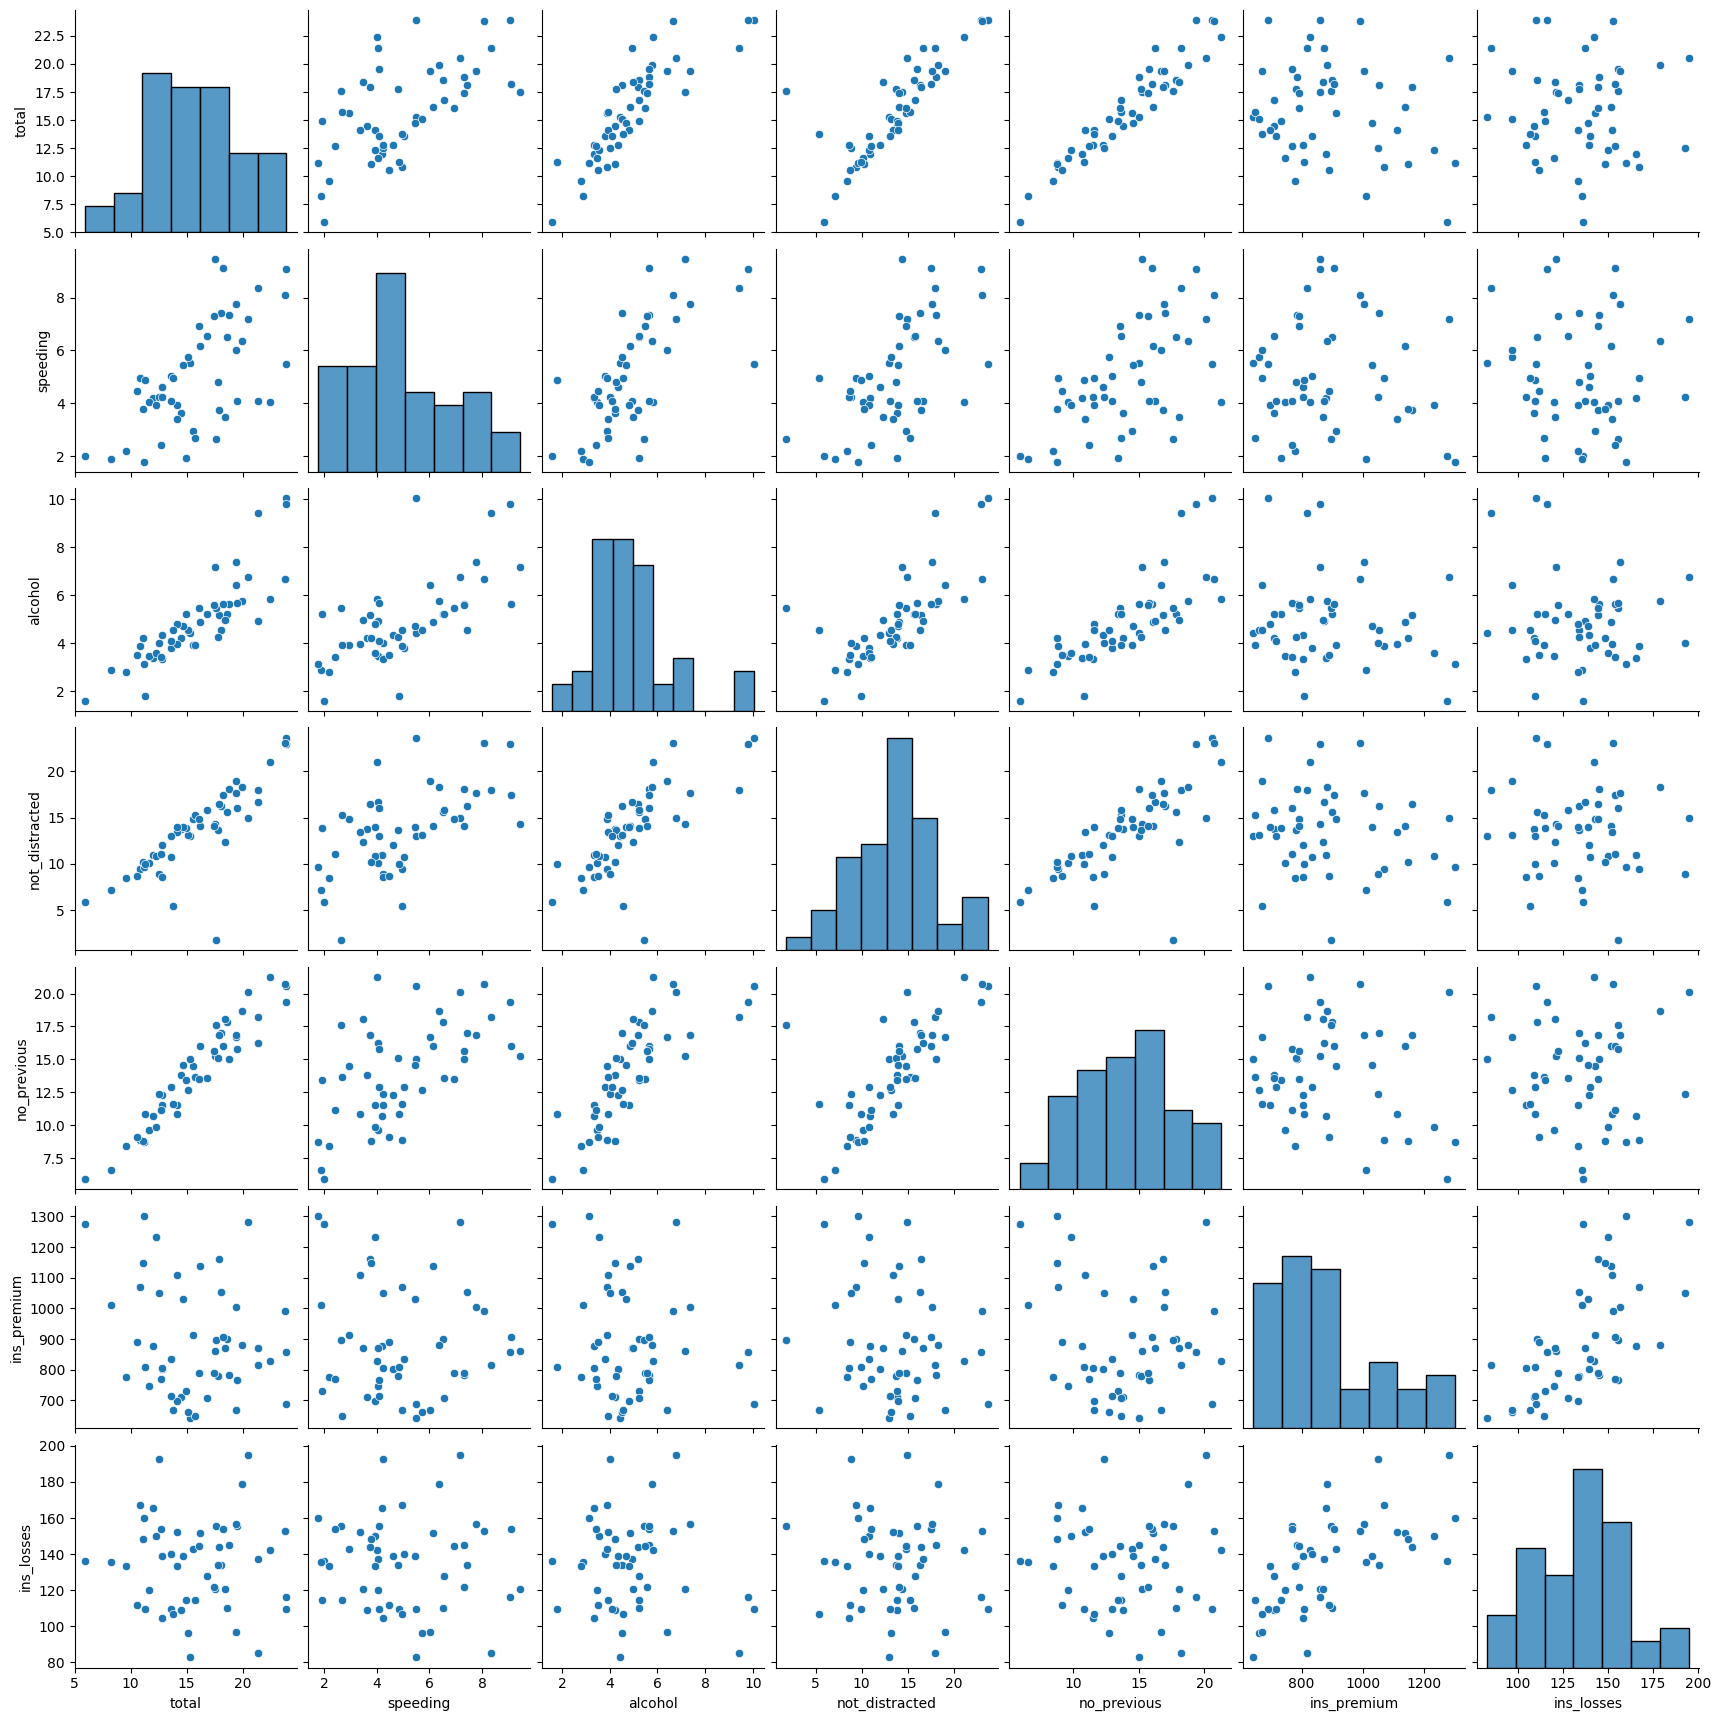

In [7]:
sns.pairplot(df)

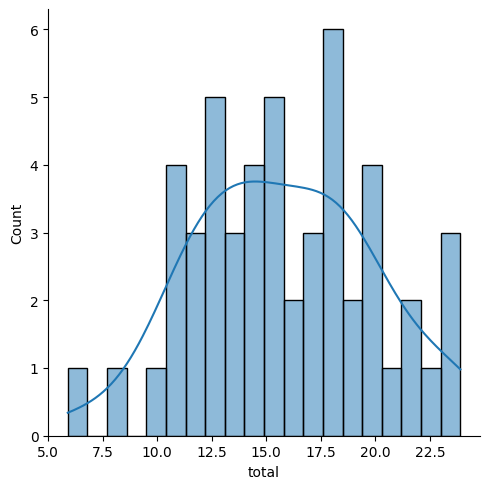

In [8]:
sns.displot(df['total'], kde=True, bins=20)

In [9]:
numeric_df = df.drop(['abbrev'], axis=1)
numeric_df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Axes: >

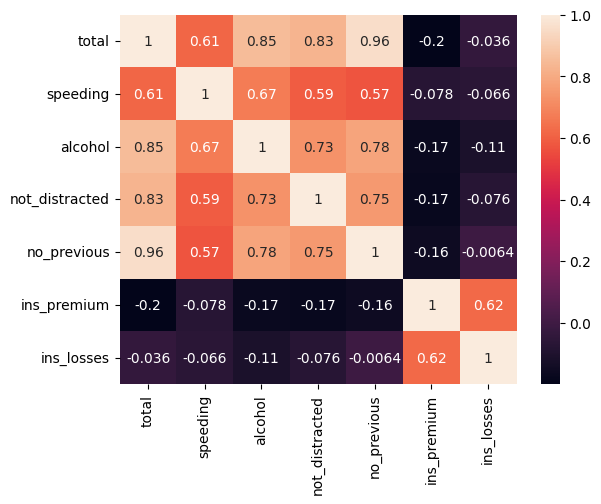

In [10]:
sns.heatmap(numeric_df.corr(), annot=True)

In [11]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

y = b+mx

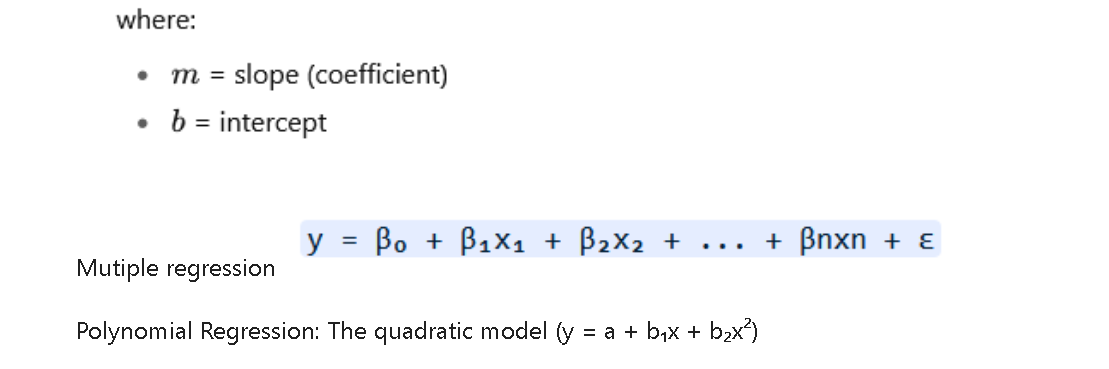

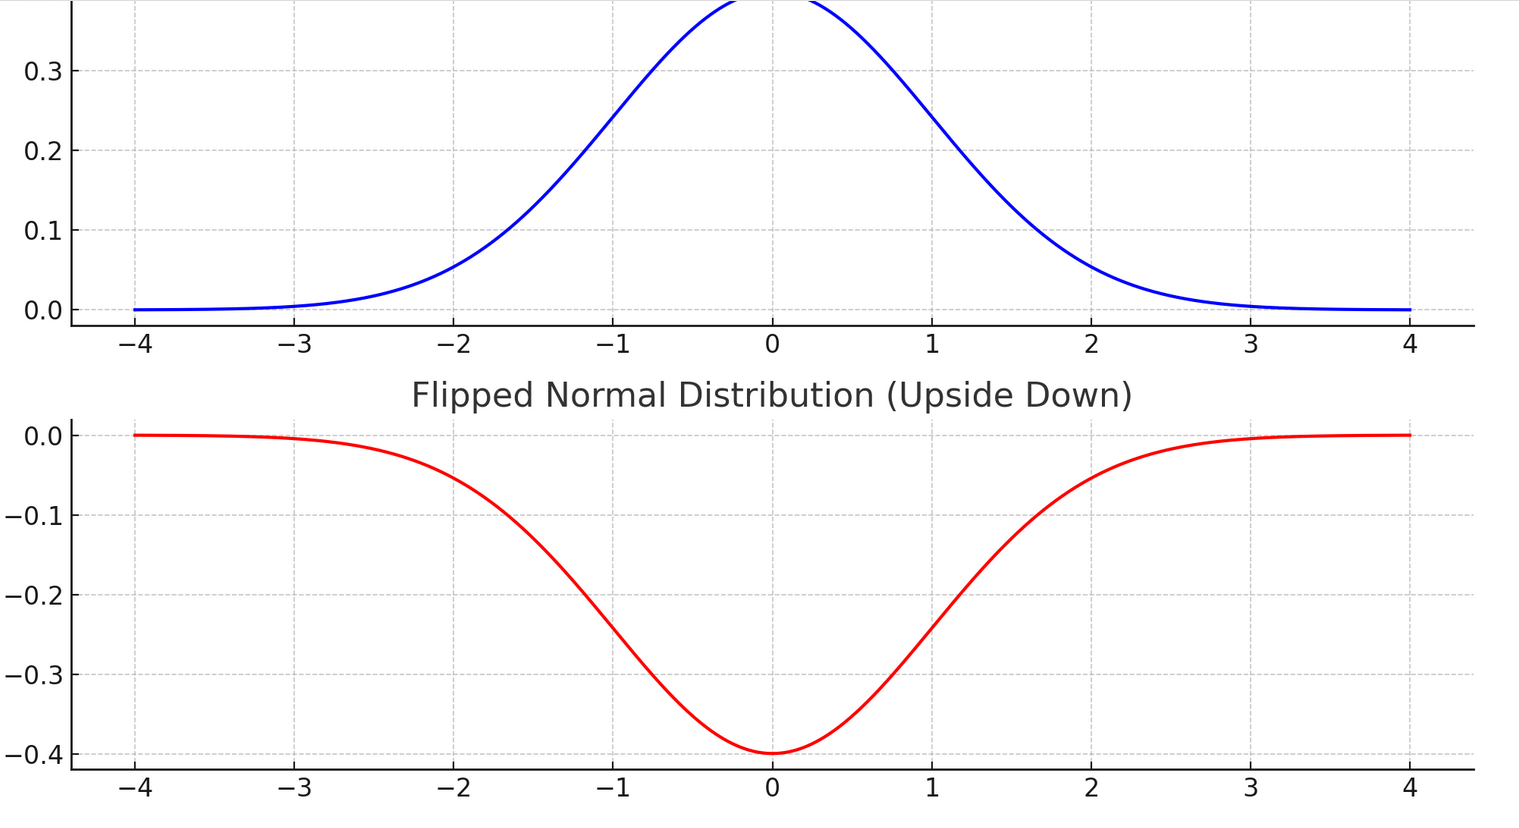

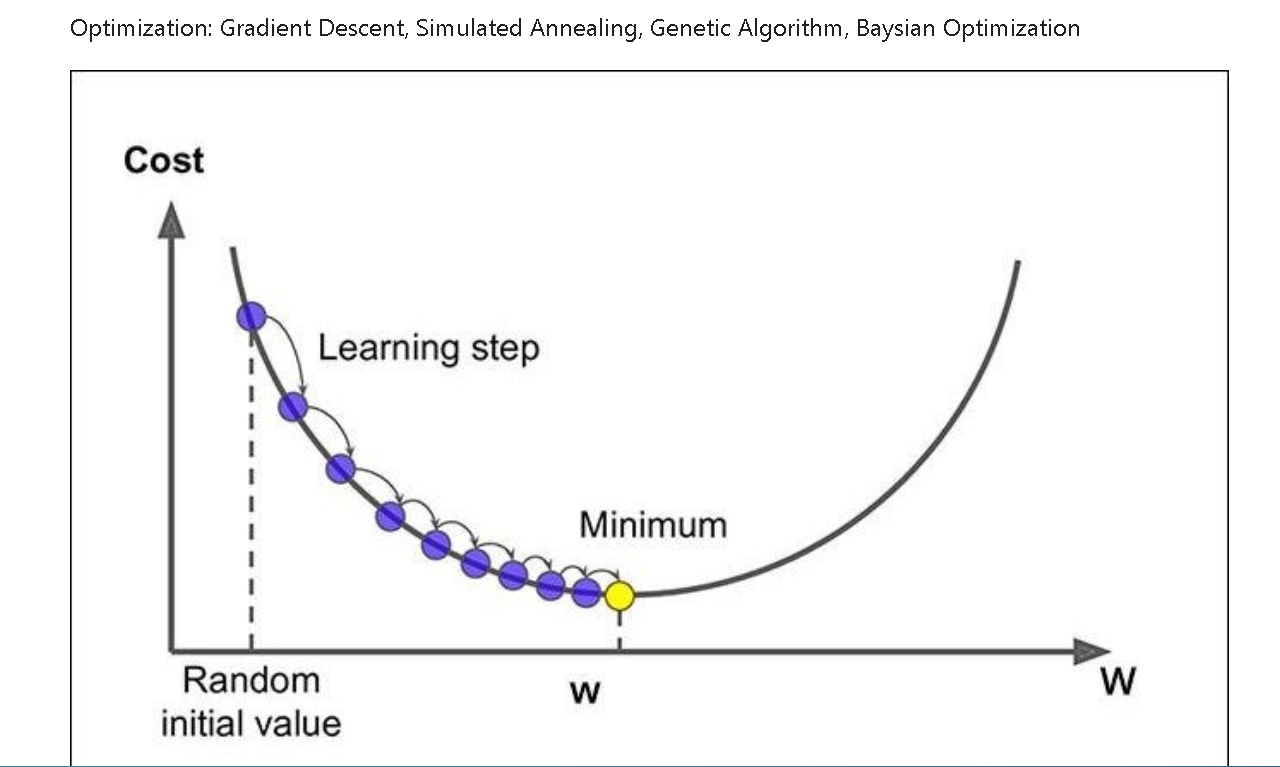

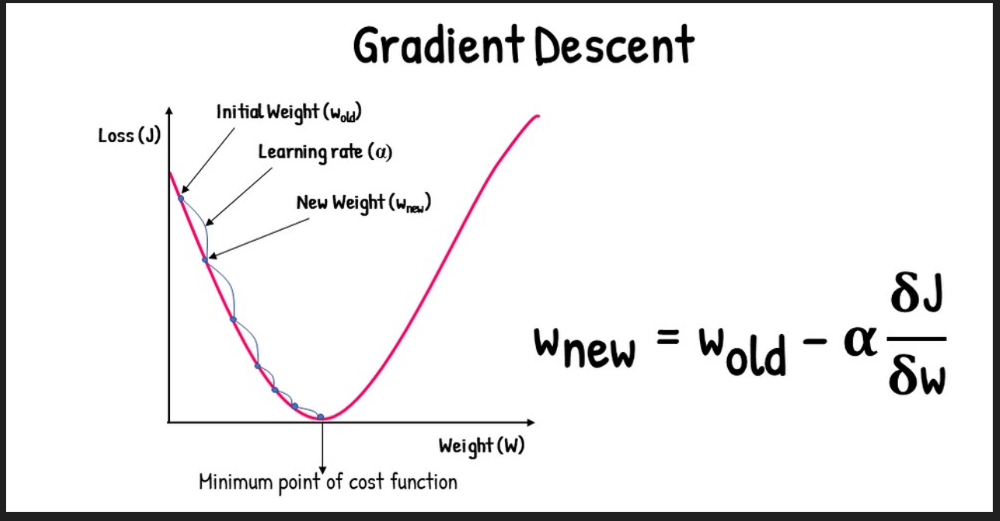

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Dictionary ---> key, value
data = {
    "hours": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Exam_score":[35, 40, 50, 55, 65, 70, 75, 80, 88, 95]
}

df_hr = pd.DataFrame(data)
df_hr.head()

,hours,Exam_score
0,1,35
1,2,40
2,3,50
3,4,55
4,5,65


In [14]:
x = df_hr[['hours']]
y = df_hr['Exam_score']

In [15]:
model = LinearRegression()

model.fit(x, y)

print('slope =', model.coef_)
print('Intercept =', model.intercept_)

slope = [6.61212121]
Intercept = 28.933333333333323


In [19]:
prediction = model.predict([[7.5]])[0]
print('Predicted score for 7.5 hours =', prediction)

Predicted score for 7.5 hours = 78.52424242424243


c:\Users\Mo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
y_pred = model.predict(x)

In [23]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 2.1187878787878818
R² Score: 0.9941600620743974


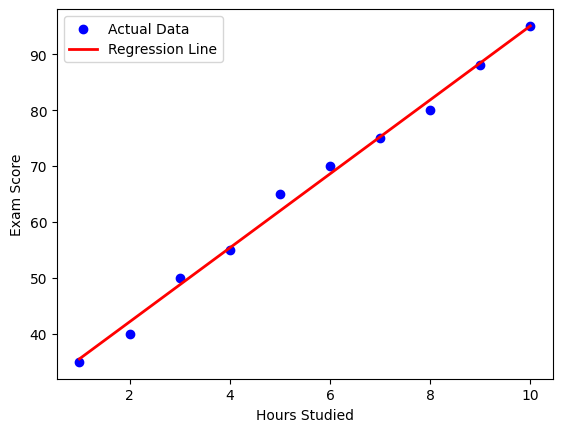

In [25]:
plt.scatter(x, y, color="blue", label="Actual Data")
plt.plot(x, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

In [26]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [27]:
X=df[['speeding', 'alcohol', 'not_distracted']]
y=df['total']

In [28]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 51
Length of y: 51


In [29]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4, random_state=1000)

In [30]:
print(X_train.shape)
print(X_test.shape)

(30, 3)
(21, 3)


In [31]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc

0.7761617456801674

In [32]:
model.coef_

array([-0.01408256,  1.74671498,  0.24902748])

In [35]:
Coeff_df = pd.DataFrame(model.coef_, X_train.columns, ['Coeff'])
Coeff_df

,Coeff
speeding,-0.014083
alcohol,1.746715
not_distracted,0.249027


In [36]:
pred=model.predict(X_test)
pred

array([17.08491539, 27.3180221 ,  8.19319917, 21.13350304, 12.50424797,
       13.03079759, 19.32927954, 24.77572293, 16.86568923, 14.58037916,
       14.29011277, 13.82723454, 17.10225669, 14.77712598, 16.66650788,
       15.07295686, 13.19451345, 12.49886538, 12.84024653,  9.5356325 ,
       14.15376817])

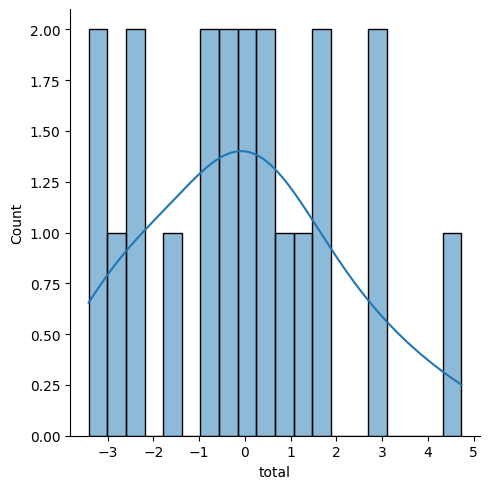

In [37]:
sns.displot(y_test-pred, kde=True, bins=20)

In [38]:
from sklearn import metrics

In [39]:
print('MAE:' ,metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSD:' ,np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.6979268346465033
MSE: 4.526750554164036
RMSD: 2.1276161670198026


In [41]:
from sklearn.datasets import make_regression

In [50]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=1000)
print(X[:5])
print(y[:5])

[[ 0.38947455]
 [-0.83532823]
 [ 0.32093155]
 [ 0.80202451]
 [-0.02548288]]
[-19.20237766 -30.66507587 -19.87387811  -2.05013153  19.40799184]


In [52]:
data = pd.DataFrame({'X': X.flatten(), 'y': y})
print(data.head())

          X          y
0  0.389475 -19.202378
1 -0.835328 -30.665076
2  0.320932 -19.873878
3  0.802025  -2.050132
4 -0.025483  19.407992


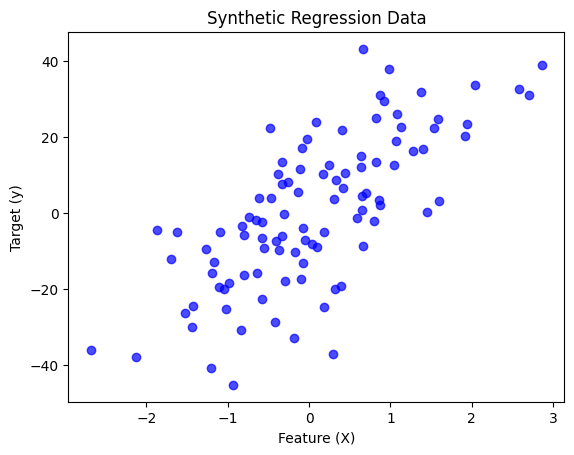

In [53]:
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title("Synthetic Regression Data")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.show()

In [54]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=1234)

In [56]:
y = y.reshape(-1, 1)
m = X.shape[0]

x.shape # (100,1)
y.shape # (100)

gradients = (2/m) * X_b.T.dot(y_pred-y)

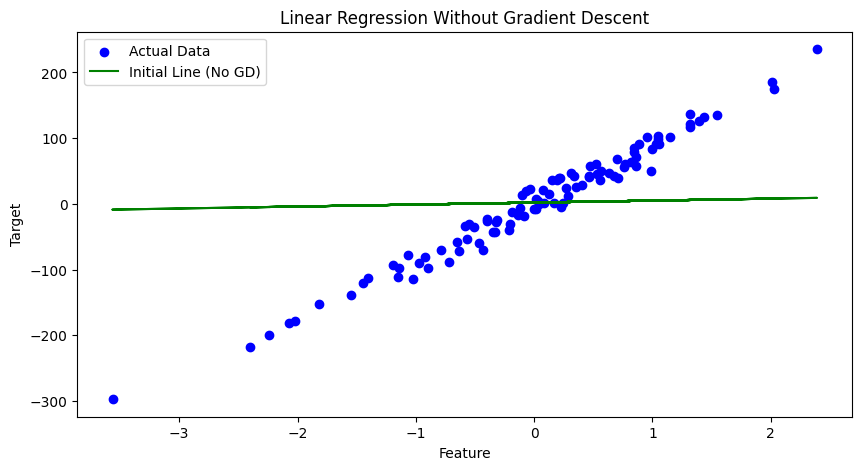

In [57]:
X_b = np.c_[np.ones((m, 1)), X]

theta = np.array([[2.0], [3.0]])

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta), color="green", label="Initial Line (No GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Without Gradient Descent")
plt.legend()
plt.show()

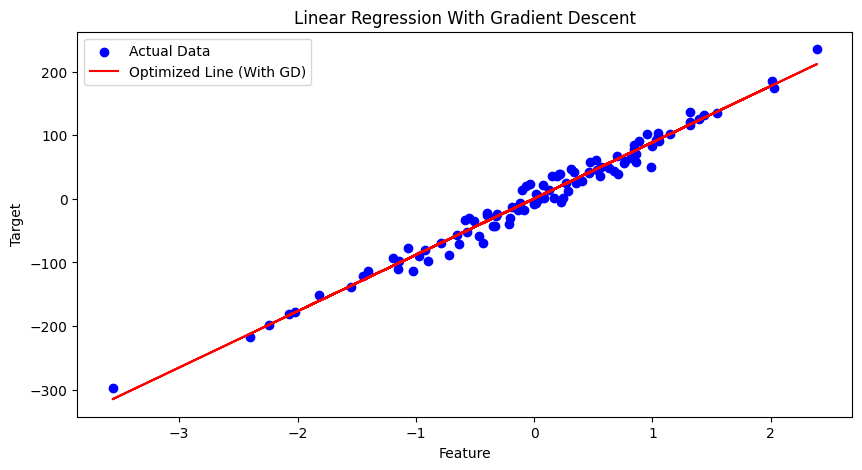

In [58]:
learning_rate = 0.1
n_iterations = 100

for i in range(n_iterations):

    y_pred = X_b.dot(theta)

    gradients = (2 / m) * X_b.T.dot(y_pred - y)
    theta -= learning_rate * gradients

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta), color="red", label="Optimized Line (With GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression With Gradient Descent")
plt.legend()
plt.show()

In [59]:
#from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

c:\Users\Mo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


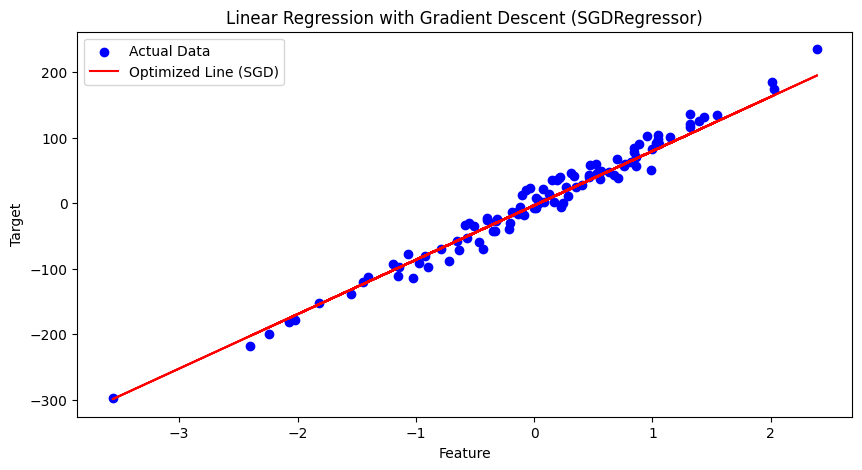

Intercept: -3.331237738623457
Coefficient: 83.05916372745035


In [60]:
sgd_reg = SGDRegressor(max_iter=1000, learning_rate="constant", eta0=0.1, penalty=None, random_state=42)
sgd_reg.fit(X, y)
y_pred = sgd_reg.predict(X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Optimized Line (SGD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression with Gradient Descent (SGDRegressor)")
plt.legend()
plt.show()

print("Intercept:", sgd_reg.intercept_[0])
print("Coefficient:", sgd_reg.coef_[0])


c:\Users\Mo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWar

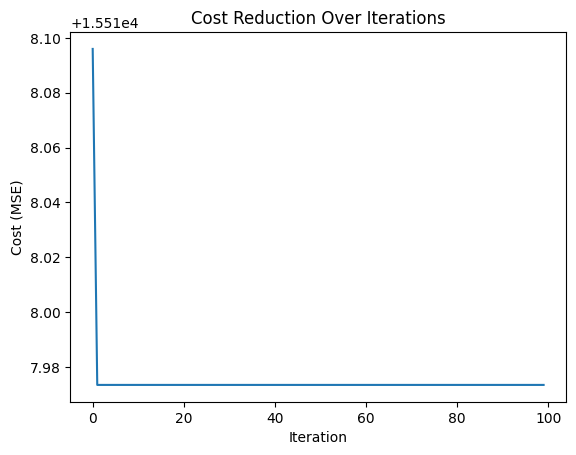

In [61]:
sgd_reg = SGDRegressor(max_iter=1, learning_rate="constant", eta0=0.1, penalty=None, random_state=42, warm_start=True)
cost_history = []

for i in range(100):
    sgd_reg.partial_fit(X, y)
    y_pred = sgd_reg.predict(X)
    cost = np.mean((y_pred - y) ** 2)
    cost_history.append(cost)

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Iterations")
plt.show()